**1. Import Libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

**2. Import Dataset**

In [89]:
data = pd.read_csv("Stock_data.csv")

In [90]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2020-07-24,90.028175,90.373263,86.655094,88.446138,185438800
1,2020-07-27,92.161865,92.254213,90.869019,91.092591,121214000
2,2020-07-28,90.647865,91.909125,90.643000,91.731720,103625600
3,2020-07-29,92.385452,92.570148,91.095031,91.131482,90329200
4,2020-07-30,93.503334,93.607830,91.148496,91.556763,158130000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1255 non-null   object 
 1   Close   1255 non-null   float64
 2   High    1255 non-null   float64
 3   Low     1255 non-null   float64
 4   Open    1255 non-null   float64
 5   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.0+ KB


In [92]:
data.describe()

,Close,High,Low,Open,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,167.584261,169.296121,165.690828,167.423931,7.829652e+07
std,36.520088,36.686540,36.268957,36.442808,4.025901e+07
min,90.028175,90.373263,86.655094,88.446138,2.323470e+07
25%,140.325523,141.628994,138.530556,140.322297,5.136690e+07
50%,165.153168,167.152099,163.768128,165.212234,6.874980e+07
75%,191.172920,192.764972,189.721716,191.138205,9.205475e+07
max,258.396667,259.474086,257.010028,257.568678,3.743368e+08


In [93]:
data.shape

(1255, 6)

In [94]:
data.tail()

,Date,Close,High,Low,Open,Volume
1250,2025-07-17,210.020004,211.800003,209.589996,210.570007,48068100
1251,2025-07-18,211.179993,211.789993,209.699997,210.869995,48974600
1252,2025-07-21,212.479996,215.779999,211.630005,212.100006,51377400
1253,2025-07-22,214.399994,214.949997,212.229996,213.139999,46404100
1254,2025-07-23,214.149994,215.149994,212.410004,215.000000,46989300


In [95]:
data.duplicated().sum()

np.int64(0)

In [96]:
data.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

**3. Outlier Detection**

In [97]:
import seaborn as sns
data['Date']=pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date',inplace=True)

<Axes: ylabel='Close'>

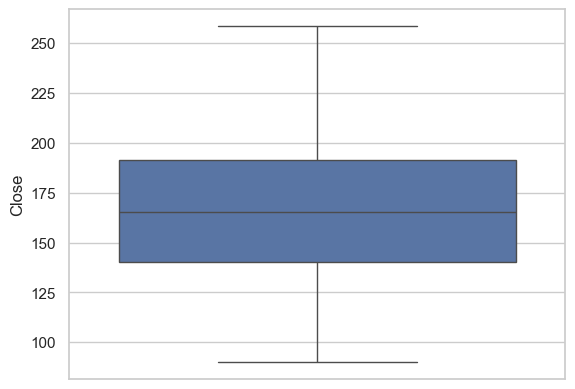

In [98]:
#boxplot
df=data
sns.boxplot(df['Close'])

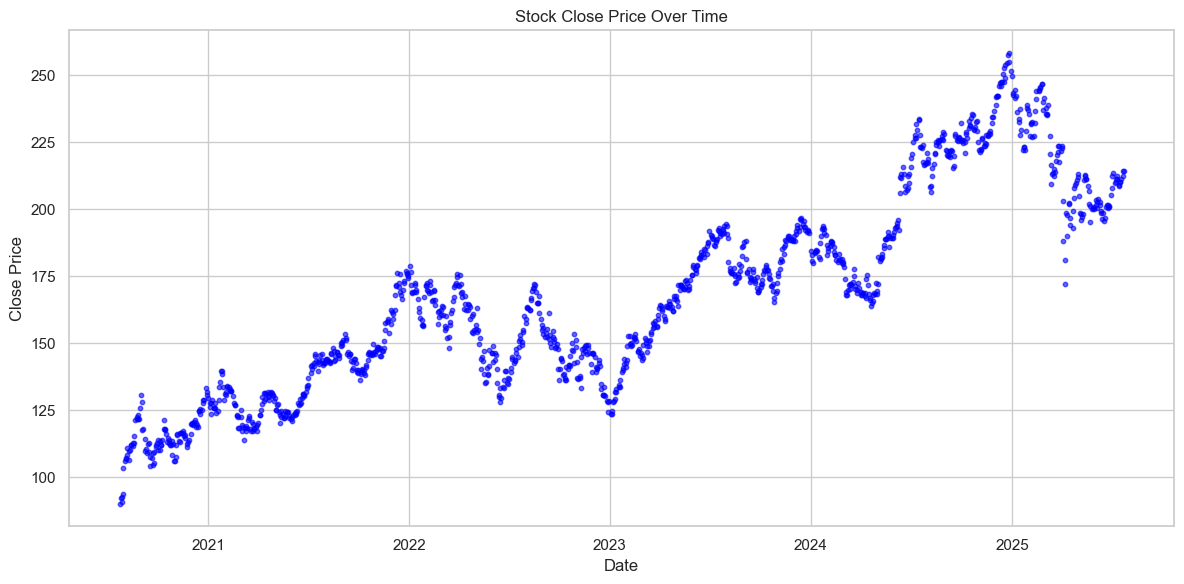

In [99]:
# scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Close'],alpha=0.6, s=10,color='blue')
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Analysis Time Series Concepts**

Trend: The long-term movement or direction in the data over time.
Seasonality:Displays recurring patterns or cycles within each year (monthly).
Residual (Noise):What’s left after removing trend and seasonality.

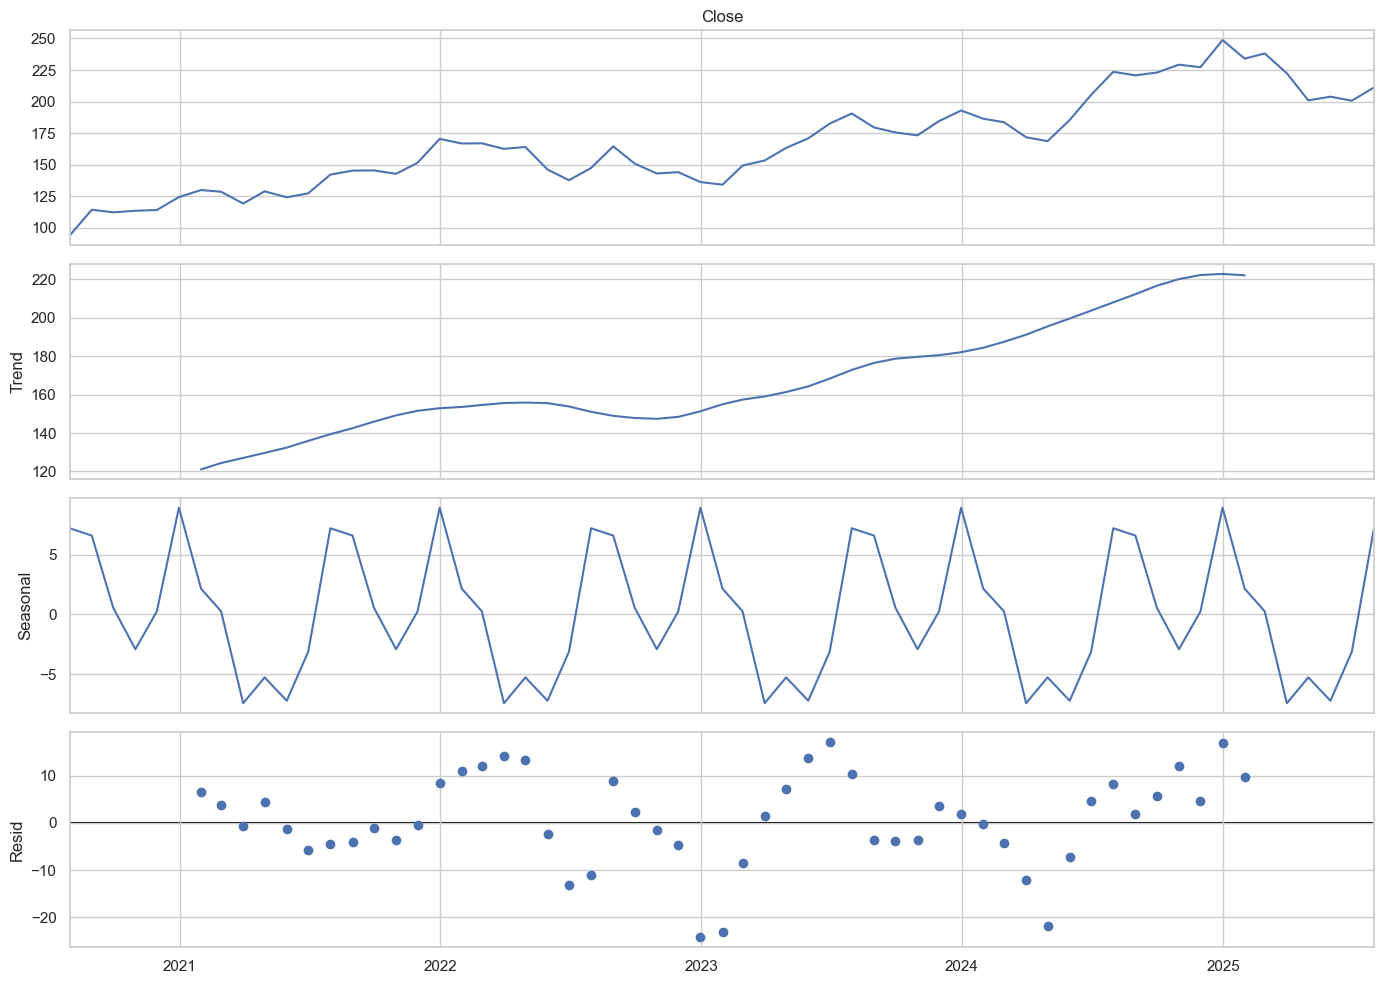

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
df=data
df
# Resample to monthly average closing price
monthly_close = df['Close'].resample('M').mean()
# Apply seasonal decomposition (additive model)
decomposition = seasonal_decompose(monthly_close, model='additive')
# Plot the decomposition results
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

**5. Forecasting**

**Prophet Forecasting**

20:09:27 - cmdstanpy - INFO - Chain [1] start processing
20:09:27 - cmdstanpy - INFO - Chain [1] done processing


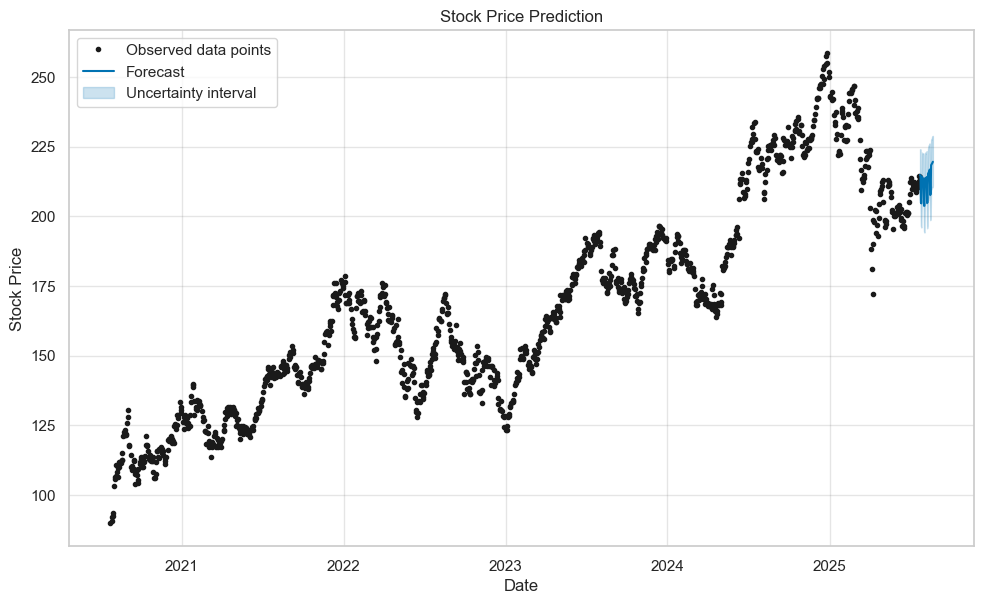

In [101]:
#Facebook prophet forecasting
from prophet import Prophet
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Plotting
#Fetch the data
data=pd.read_csv('Stock_data.csv')
data['Date']=pd.to_datetime(data['Date'],format='mixed')
# data.sort_values(by='Date',inplace=True)
# set Date as index column
data.set_index('Date',inplace=True)
# reset index and rename columns
df=data.reset_index()[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
# model creation
model=Prophet()
model.fit(df)
# future prediction
future=model.make_future_dataframe(periods=30,include_history=False)
# Prediction
prediction=model.predict(future)
# plot prediction
model.plot(prediction)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [102]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-07-24,213.010074,205.694056,224.005919,213.010074,213.010074,1.792134,1.792134,1.792134,2.637499,2.637499,2.637499,-0.845364,-0.845364,-0.845364,0.0,0.0,0.0,214.802209
1,2025-07-25,212.977556,205.620921,224.046153,212.977556,212.977556,1.677547,1.677547,1.677547,2.708321,2.708321,2.708321,-1.030774,-1.030774,-1.030774,0.0,0.0,0.0,214.655103
2,2025-07-26,212.945039,196.504610,213.881492,212.945039,212.945039,-8.120959,-8.120959,-8.120959,-6.900028,-6.900028,-6.900028,-1.220932,-1.220932,-1.220932,0.0,0.0,0.0,204.824079
3,2025-07-27,212.912521,195.971153,213.972543,212.912521,212.912521,-8.308265,-8.308265,-8.308265,-6.900028,-6.900028,-6.900028,-1.408237,-1.408237,-1.408237,0.0,0.0,0.0,204.604255
4,2025-07-28,212.880003,204.994209,222.862835,212.880003,212.880003,1.349406,1.349406,1.349406,2.934541,2.934541,2.934541,-1.585135,-1.585135,-1.585135,0.0,0.0,0.0,214.229408
5,2025-07-29,212.847485,205.666275,222.544010,212.847485,212.847485,1.073489,1.073489,1.073489,2.817772,2.817772,2.817772,-1.744283,-1.744283,-1.744283,0.0,0.0,0.0,213.920974
6,2025-07-30,212.814967,204.339392,222.505268,212.814967,212.814967,0.823210,0.823210,0.823210,2.701923,2.701923,2.701923,-1.878713,-1.878713,-1.878713,0.0,0.0,0.0,213.638177
7,2025-07-31,212.782449,204.279794,222.671208,212.782449,212.782449,0.655505,0.655505,0.655505,2.637499,2.637499,2.637499,-1.981994,-1.981994,-1.981994,0.0,0.0,0.0,213.437954
8,2025-08-01,212.749931,204.291217,222.072356,212.749931,212.749931,0.659947,0.659947,0.659947,2.708321,2.708321,2.708321,-2.048374,-2.048374,-2.048374,0.0,0.0,0.0,213.409879
9,2025-08-02,212.717413,194.545115,212.814050,212.717413,212.717413,-8.972943,-8.972943,-8.972943,-6.900028,-6.900028,-6.900028,-2.072915,-2.072915,-2.072915,0.0,0.0,0.0,203.744470


**ARIMA Forecasting**

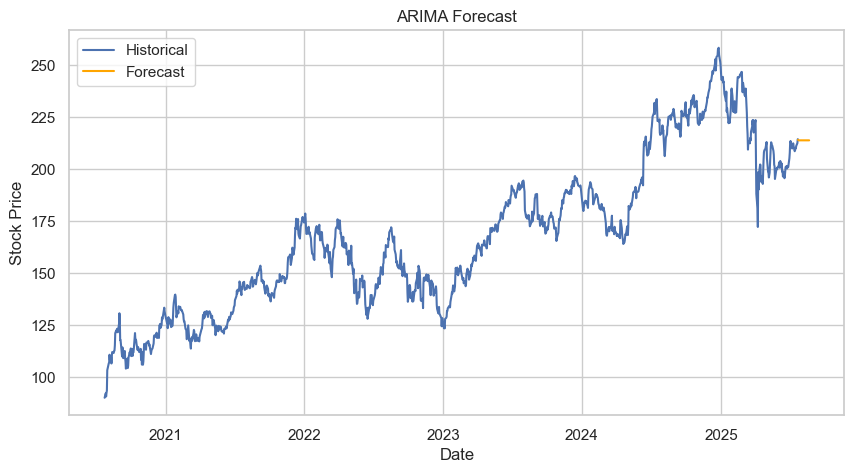

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Load and prepare data
data = pd.read_csv('Stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)
series = data['Close']
# Fit ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
# Forecast next 365 days
forecast = model_fit.forecast(steps=30)
# Plot original and forecast
plt.figure(figsize=(10, 5))
plt.plot(series, label='Historical')
plt.plot(pd.date_range(series.index[-1], periods=30, freq='D'),forecast,label='Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [104]:
forecast

1255    214.092870
1256    213.927488
1257    213.855117
1258    213.829931
1259    213.842061
1260    213.851464
1261    213.858134
1262    213.859799
1263    213.859528
1264    213.858732
1265    213.858267
1266    213.858094
1267    213.858103
1268    213.858152
1269    213.858189
1270    213.858204
1271    213.858205
1272    213.858202
1273    213.858199
1274    213.858198
1275    213.858197
1276    213.858198
1277    213.858198
1278    213.858198
1279    213.858198
1280    213.858198
1281    213.858198
1282    213.858198
1283    213.858198
1284    213.858198
Name: predicted_mean, dtype: float64

**SARIMA Forecasting**

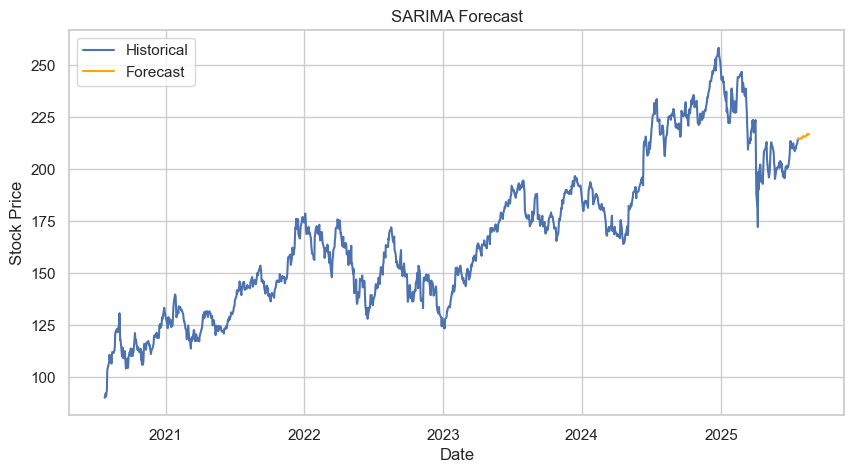

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Load and prepare time series
data = pd.read_csv('Stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data.set_index('Date', inplace=True)
# Select the target column
series = data['Close']
# Fit SARIMA model
model = SARIMAX(series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# Forecast next 365 steps
forecast = model_fit.forecast(steps=30)
# Plot
plt.figure(figsize=(10, 5))
plt.plot(series, label='Historical')
plt.plot(pd.date_range(series.index[-1], periods=30, freq='D'), forecast,label='Forecast', color='orange')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [106]:
forecast

1255    214.483816
1256    214.875817
1257    214.603237
1258    214.556938
1259    214.677915
1260    214.678348
1261    214.736496
1262    214.811515
1263    214.667441
1264    214.852493
1265    215.304230
1266    215.201393
1267    215.526928
1268    215.939764
1269    215.710913
1270    215.630476
1271    215.675989
1272    215.690307
1273    215.776582
1274    215.845504
1275    215.738412
1276    215.955082
1277    216.448457
1278    216.341447
1279    216.667217
1280    217.079462
1281    216.849371
1282    216.769901
1283    216.817555
1284    216.831479
Name: predicted_mean, dtype: float64

**LSTM Forecasting**

Shape of data: (1255, 5)
Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0918
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0070
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0040
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0023
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0018
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0014
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0013
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0013
Epoch 9/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0013
Epoch 10/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0012
Epoch 11/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0013
Epoch 12/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0012
Epoch 13/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0011
Epoch 14/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0011
Epoch 15/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms

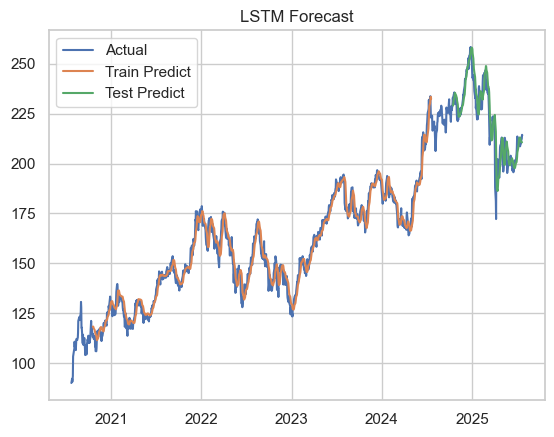

In [121]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf # Importing yfinance to load data

# 📥 Load Data
data = pd.read_csv('Stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Prepare for Prophet
# Instead of selecting 'Date' as a column, reset the index
# and then select 'Date' and 'Close'
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Prepare Data
# Print the shape of 'data' to check if it's empty
print("Shape of data:", data.shape)
scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data.values.reshape(-1,1))
# Check if 'data.values' is empty before reshaping
if data.empty:
    print("Error: 'data' DataFrame is empty. Please check data loading or preprocessing.")
else:
    # *** The Fix: Select only the 'Close' column for scaling ***
    scaled_data = scaler.fit_transform(data[['Close']].values.reshape(-1,1))


# Split into train/test
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape for LSTM input (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train
model.fit(X_train, y_train, epochs=40, batch_size=64)

# Predict
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Inverse Scaling
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

# Plot
plt.plot(data.index, data['Close'], label='Actual') # Changed data.values to data['Close']
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
plt.plot(data.index[len(train_predict)+(time_step*2)+1:len(data)-1], test_predict, label='Test Predict')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

**6. Evaluation Metrices**

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

**Prophet Evaluation**

In [115]:
# Compare only the last 30 actual values with the 30 Prophet predictions
actual_prophet = data['Close'][-30:].values
pred_prophet = prediction['yhat'].values  # Prophet predictions (30 values)

mae_prophet = mean_absolute_error(actual_prophet, pred_prophet)
rmse_prophet = np.sqrt(mean_squared_error(actual_prophet, pred_prophet))
r2_prophet = r2_score(actual_prophet, pred_prophet)

print("📈 Prophet Metrics:")
print(f"MAE: {mae_prophet:.3f}")
print(f"RMSE: {rmse_prophet:.3f}")
print(f"R² Score: {r2_prophet:.3f}")

📈 Prophet Metrics:
MAE: 7.996
RMSE: 9.283
R² Score: -1.383


**Arima Evaluation**

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use the last 30 actual values and ARIMA forecast
actual_arima = series[-30:].values
pred_arima = forecast.values  # ARIMA predictions

# Metrics
mae_arima = mean_absolute_error(actual_arima, pred_arima)
rmse_arima = np.sqrt(mean_squared_error(actual_arima, pred_arima))
r2_arima = r2_score(actual_arima, pred_arima)

print("📈 ARIMA Metrics:")
print(f"MAE: {mae_arima:.3f}")
print(f"RMSE: {rmse_arima:.3f}")
print(f"R² Score: {r2_arima:.3f}")

📈 ARIMA Metrics:
MAE: 9.693
RMSE: 11.076
R² Score: -2.392


**Sarima Evaluation**

In [117]:
actual_sarima = df['y'][-30:].values  # last 30 actual values
pred_sarima = forecast.values         # SARIMA predictions (30 values)

mae_sarima = mean_absolute_error(actual_sarima, pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(actual_sarima, pred_sarima))
r2_sarima = r2_score(actual_sarima, pred_sarima)

print("📈 SARIMA Metrics:")
print(f"MAE: {mae_sarima:.3f}")
print(f"RMSE: {rmse_sarima:.3f}")
print(f"R² Score: {r2_sarima:.3f}")

📈 SARIMA Metrics:
MAE: 9.693
RMSE: 11.076
R² Score: -2.392


**LSTM Evaluation**

In [122]:
# Evaluation
# Predict
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
# Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAE: 5.50
RMSE: 7.82
R² Score: 0.81
